In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('Company_Data.csv',index_col=False)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(i,"\n",df[i].value_counts())

ShelveLoc 
 Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Urban 
 Yes    282
No     118
Name: Urban, dtype: int64
US 
 Yes    258
No     142
Name: US, dtype: int64


In [11]:
df.shape

(400, 11)

(array([ 96.,   0.,   0.,   0.,   0.,  85.,   0.,   0.,   0., 219.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

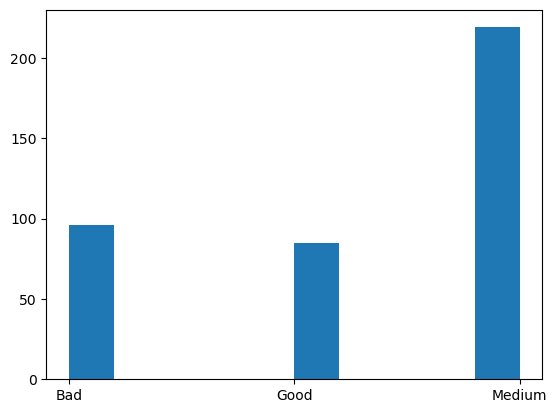

In [10]:
plt.hist(df['ShelveLoc'])

In [8]:
categorical_features = df.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [9]:
le=LabelEncoder()
for i in categorical_features:
    df[i]=le.fit_transform(df[i])

In [10]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [13]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [14]:
df.duplicated().any()

False

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_16656\2663568815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


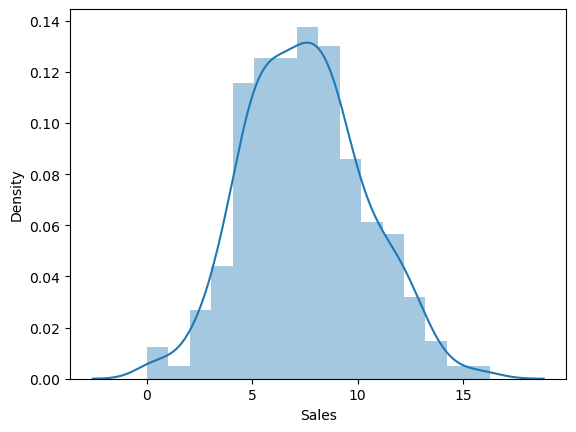

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_16656\2663568815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


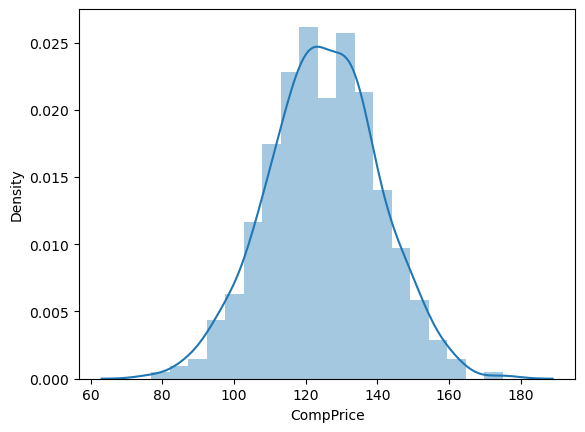

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_16656\2663568815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


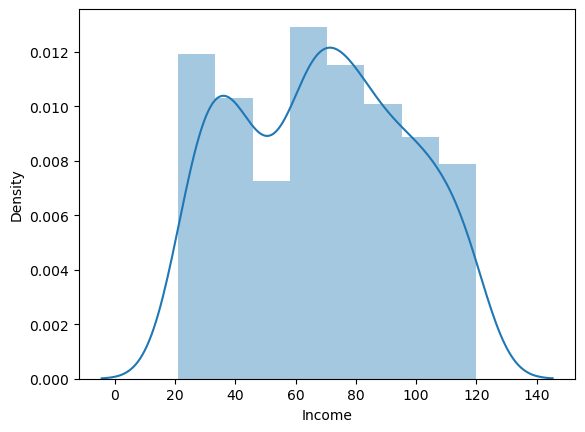

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_16656\2663568815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


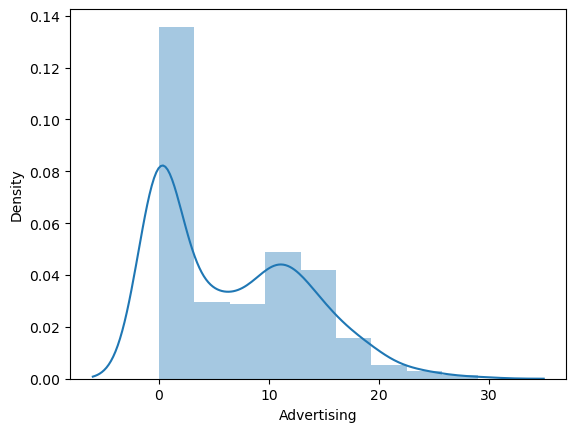

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_16656\2663568815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


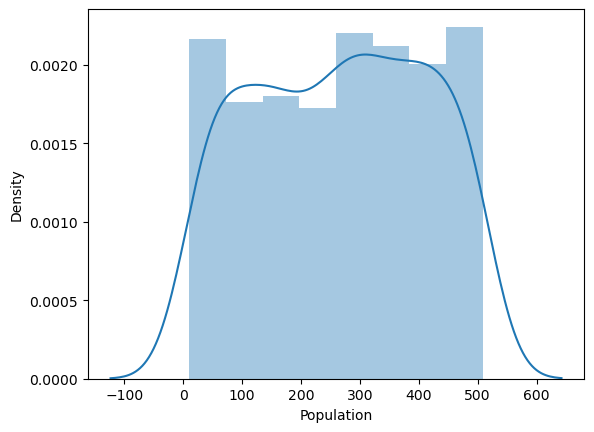

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_16656\2663568815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


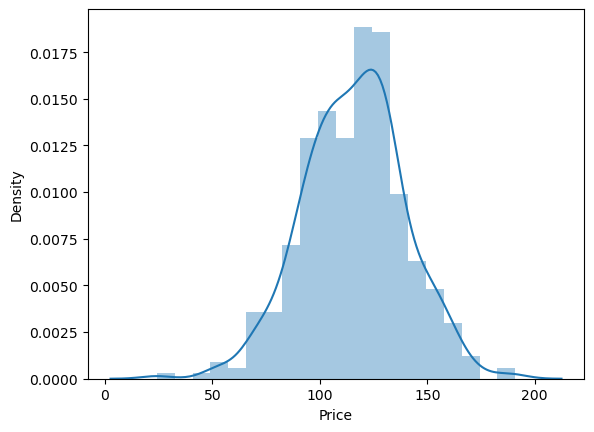

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_16656\2663568815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


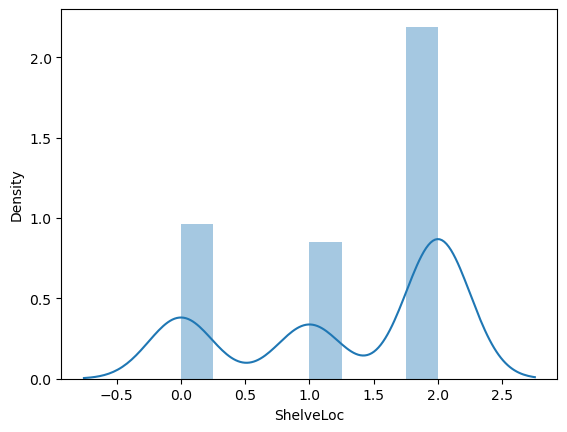

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_16656\2663568815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


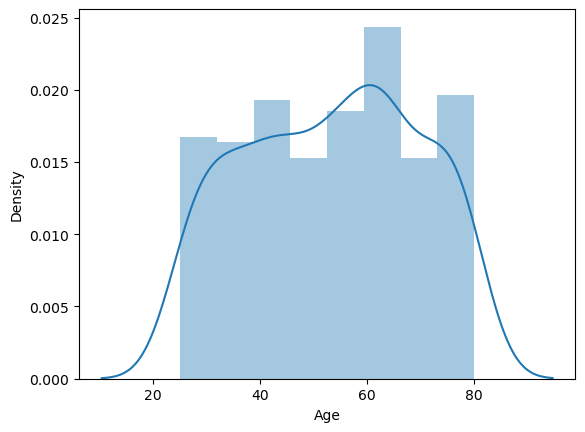

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_16656\2663568815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


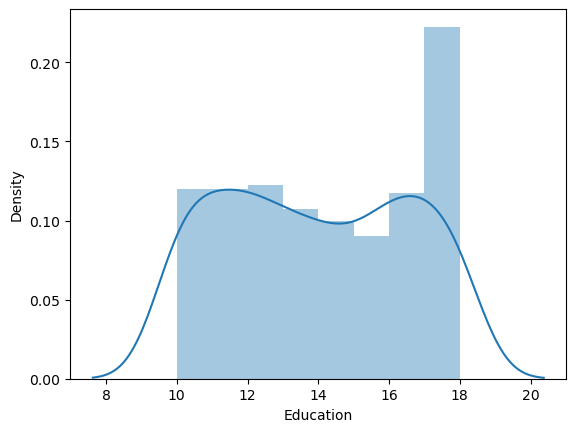

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_16656\2663568815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


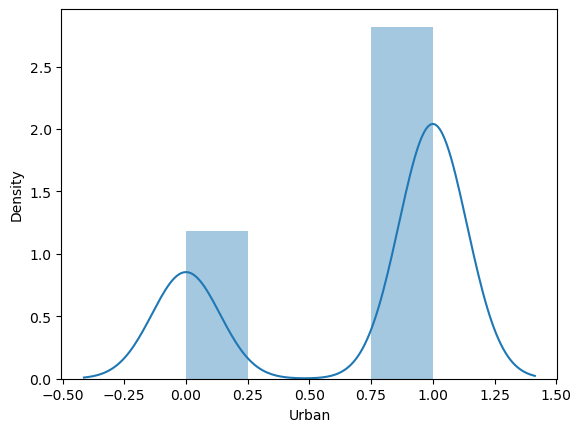

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_16656\2663568815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


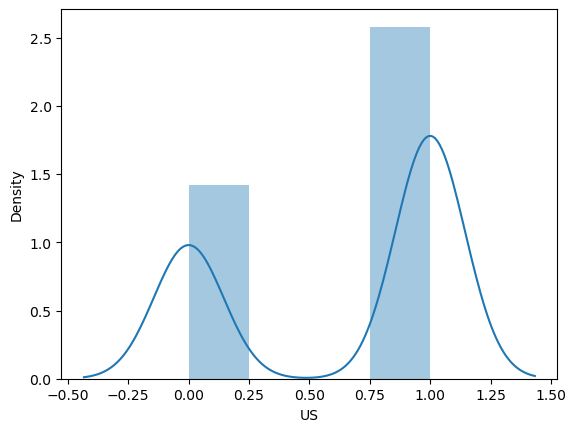

In [15]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [16]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


Sales


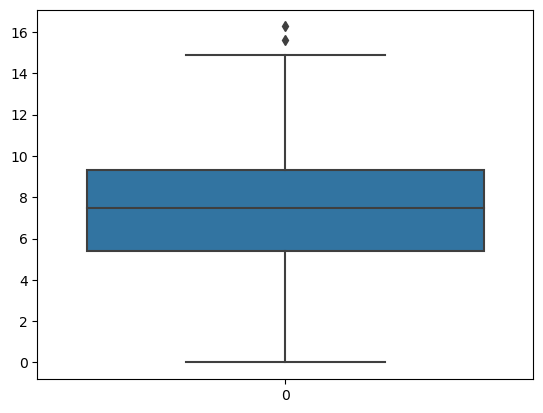

CompPrice


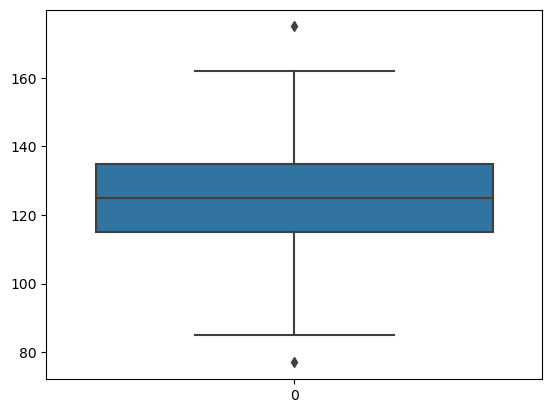

Income


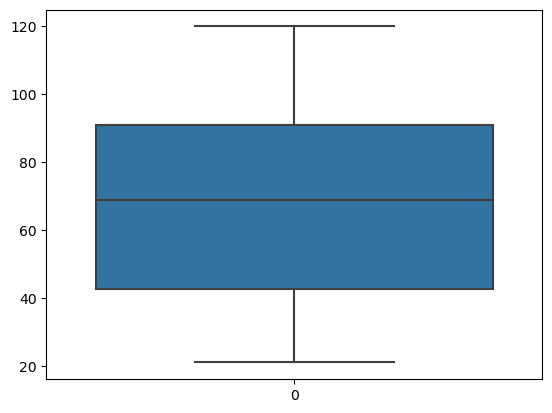

Advertising


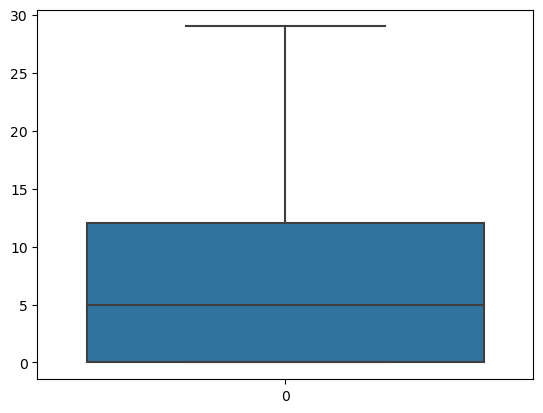

Population


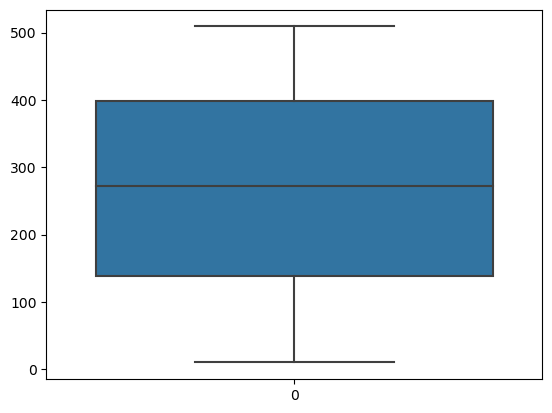

Price


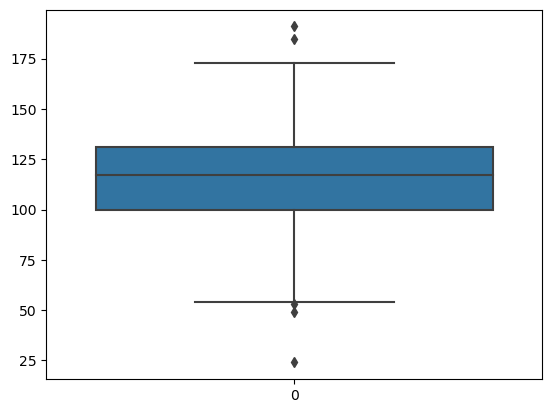

ShelveLoc


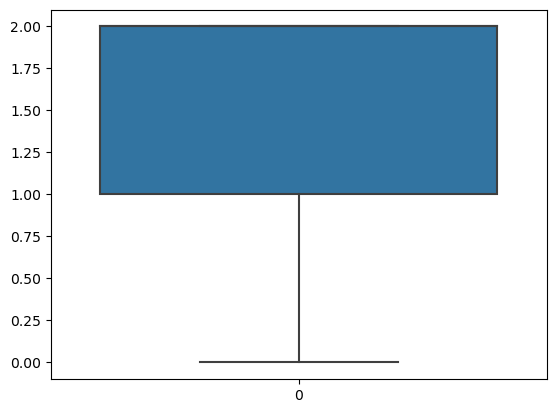

Age


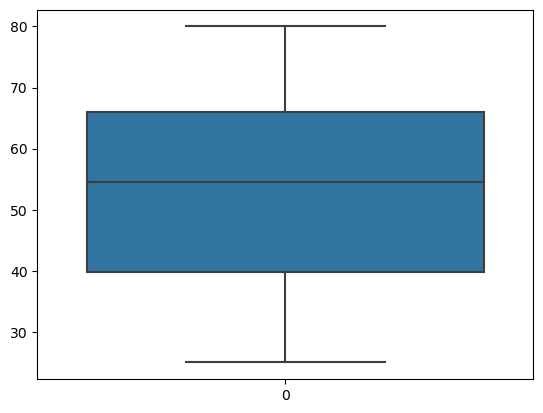

Education


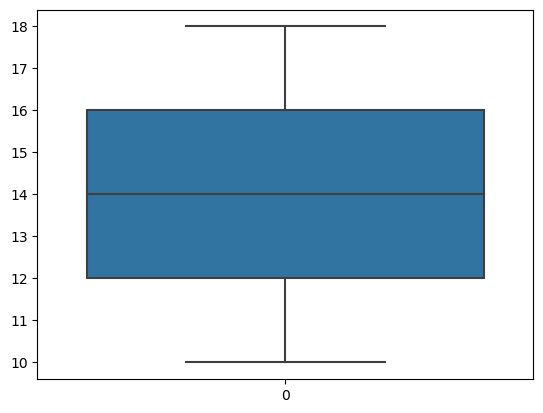

Urban


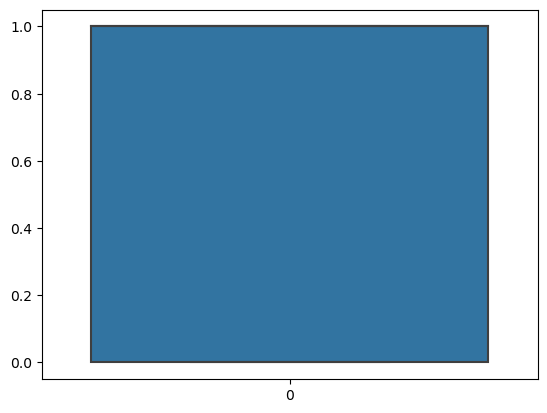

US


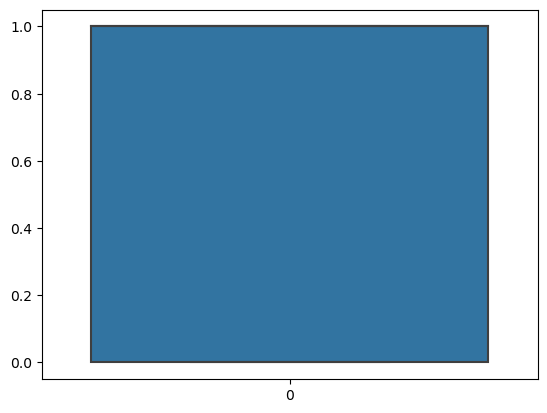

In [17]:
for i in df.columns:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [32]:
# finding IQR value
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sales            3.79
CompPrice       20.00
Income          48.25
Advertising     12.00
Population     261.00
Price           30.00
ShelveLoc        1.00
Age             26.25
Education        4.00
Urban            1.00
US               1.00
dtype: float64


In [33]:
# filtering
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(389, 11)

In [34]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,7.418689,125.115681,68.760925,6.629820,264.334190,116.439589,1.303342,53.344473,13.902314,0.704370,0.650386
std,2.678337,14.728627,28.030946,6.566216,147.541594,21.692190,0.837592,16.229018,2.624374,0.456913,0.477462
min,0.160000,85.000000,21.000000,0.000000,10.000000,63.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.360000,115.000000,43.000000,0.000000,139.000000,101.000000,1.000000,39.000000,12.000000,0.000000,0.000000
50%,7.430000,125.000000,69.000000,5.000000,272.000000,118.000000,2.000000,55.000000,14.000000,1.000000,1.000000
75%,9.140000,135.000000,91.000000,12.000000,398.000000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,13.910000,162.000000,120.000000,26.000000,509.000000,173.000000,2.000000,80.000000,18.000000,1.000000,1.000000


Error in callback <function _draw_all_if_interactive at 0x000002493D902C00> (for post_execute):


KeyboardInterrupt: 

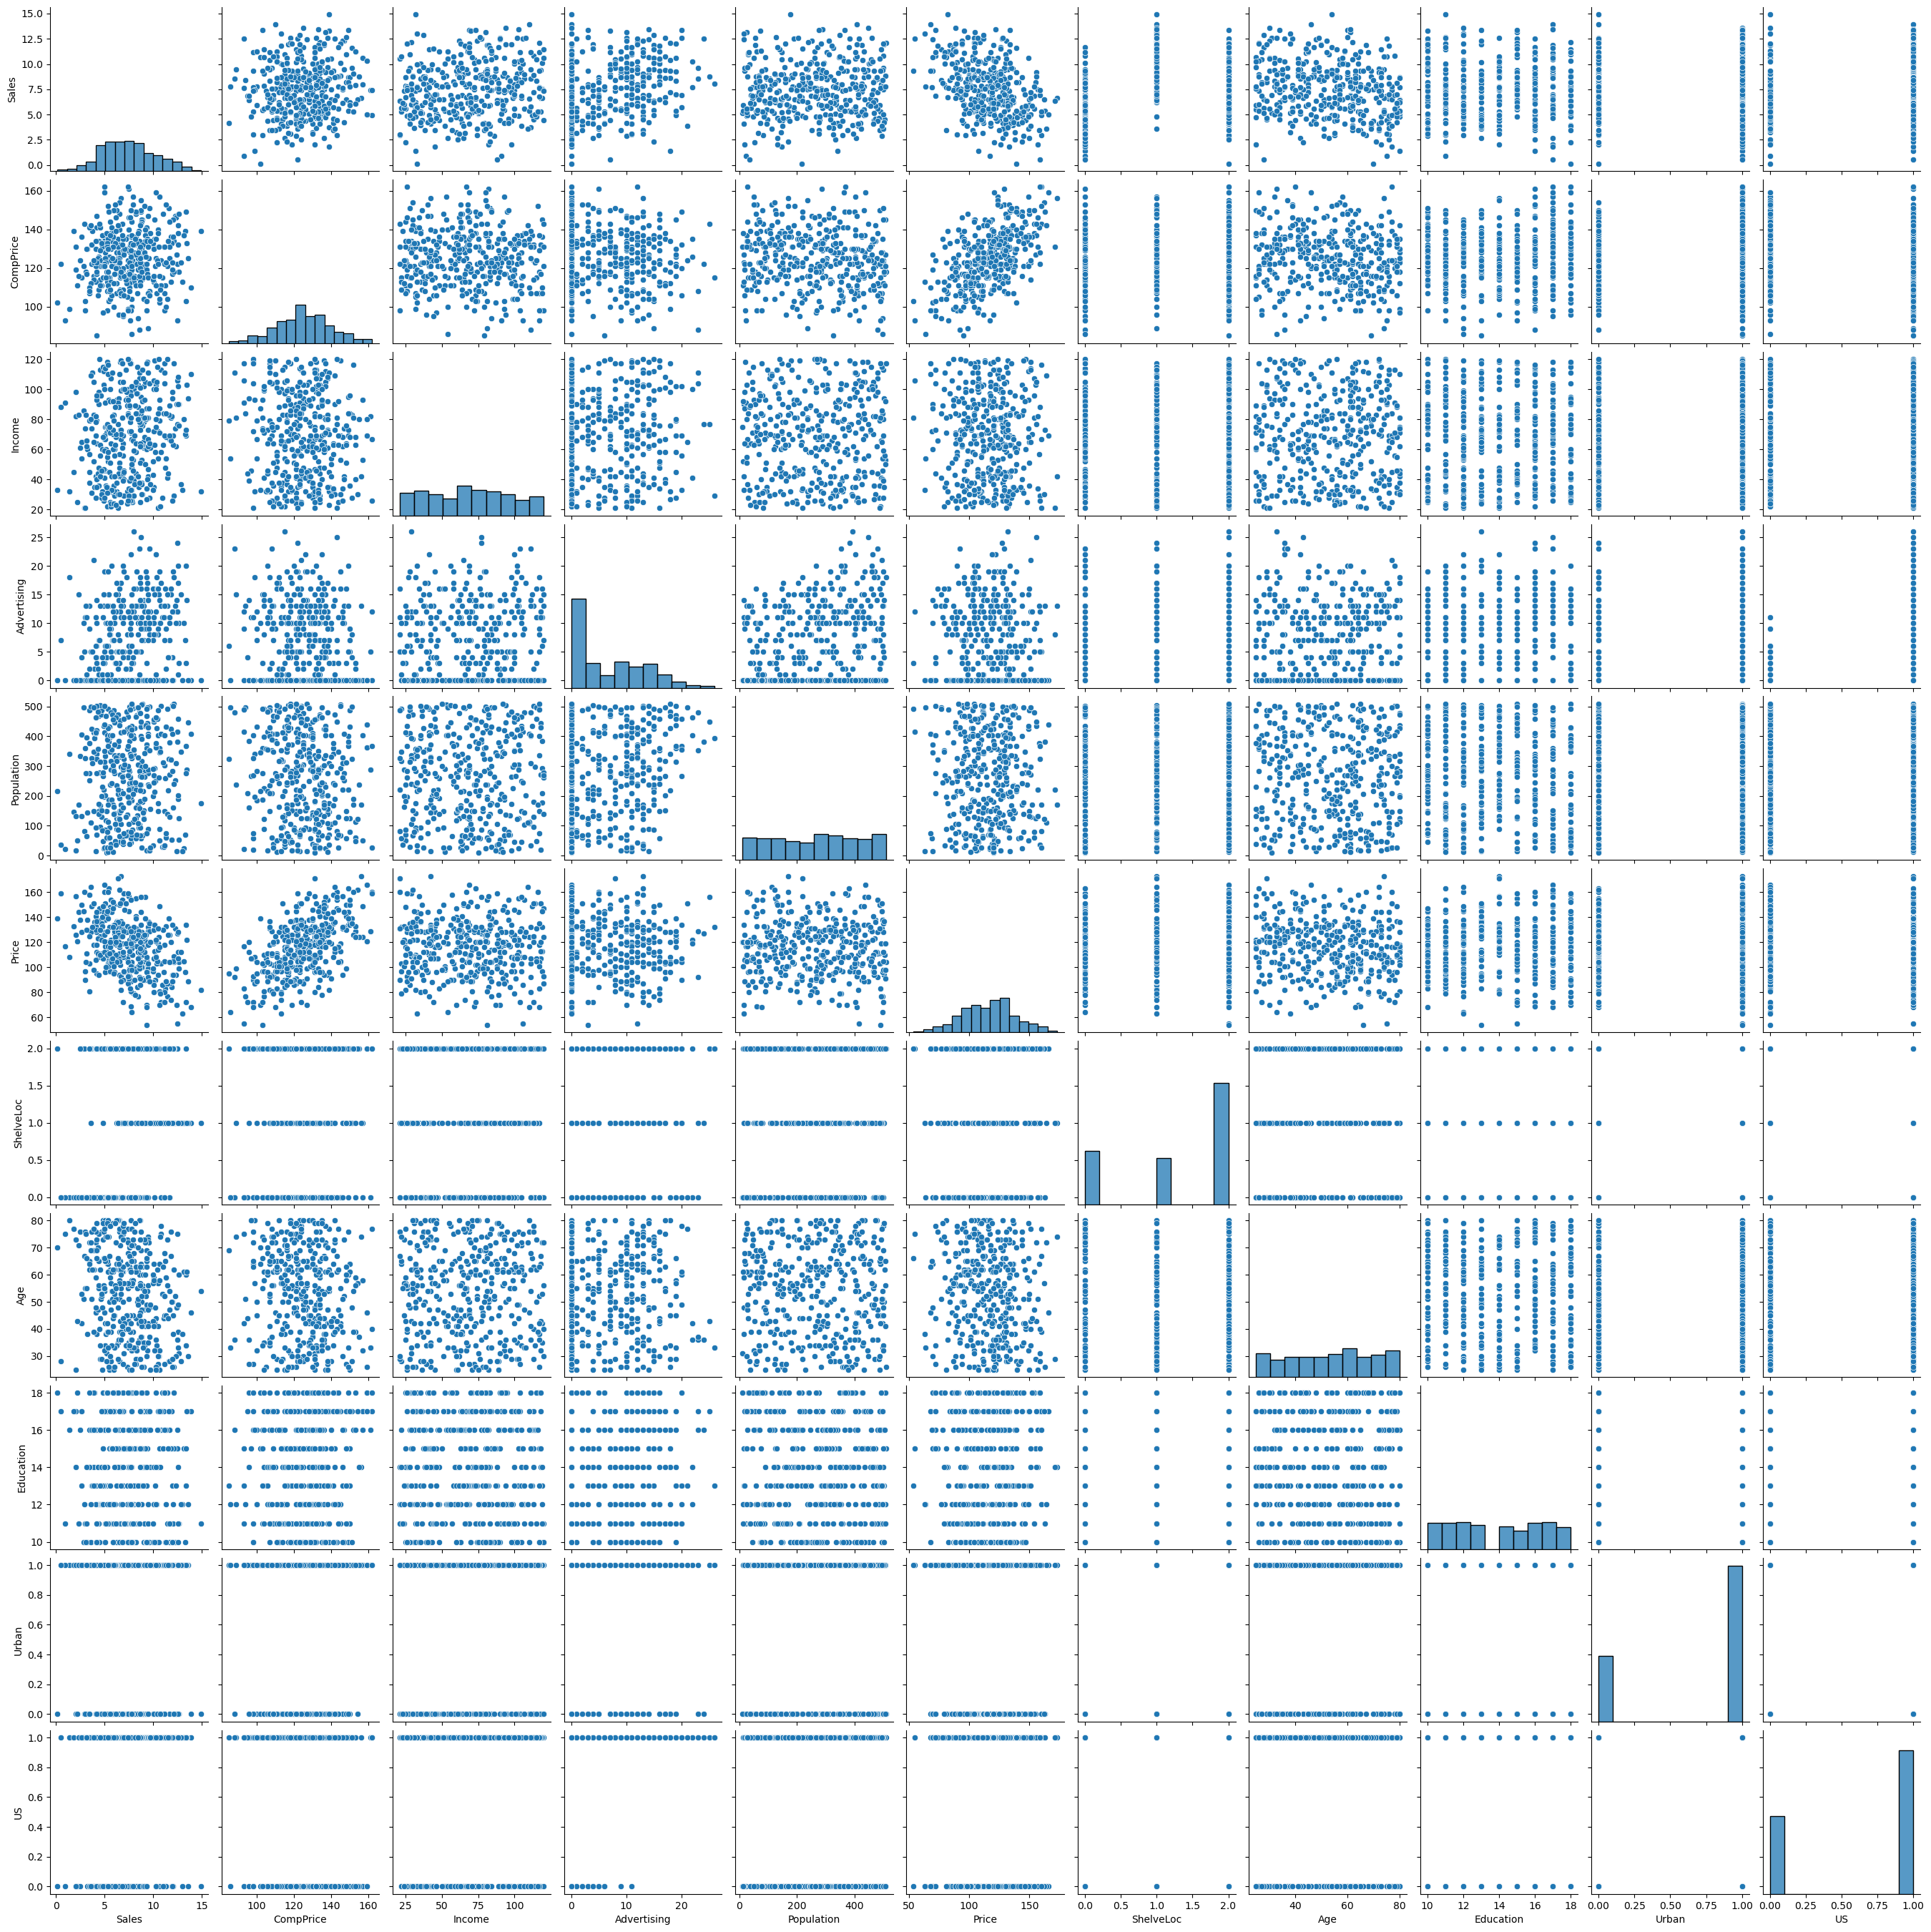

In [22]:
sns.pairplot(df)

In [55]:
X=df.drop('ShelveLoc',axis=1)
X

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [56]:
y=df['ShelveLoc']
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 389, dtype: int32

In [57]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=100)

In [58]:
model=DecisionTreeClassifier()

In [59]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
model.score(X_test,y_test)

0.5897435897435898